# Why Locally?

## The Importance of Private LLMs

we don't just want a chatbot with which we can talk to about the things in which it was trained and fine tuned on, but we want a live and dynamic model that learns about our data, needs, ionformatiob and so on. Now, the answer to that isto leverage something called RAG or retrieval augmented generation, which is a technique introduced in [Piktus et al. 2021](https://arxiv.org/pdf/2005.11401.pdf), and its about augmenting LLMs with knowledge from documents such as pdfs, csvs, .txt files etc...

However, when we talk about RAG, the immmediate question that comes to mind is where would I be sending my data to?

Now, privacy has been a concern since the birth of LLMs, and that is because,the public as a whole wants to know where its data is going to.

With the integration of LLMs to our personal data, be it for research or work, or personal productivity, what have you, the problem becomes, ok, how can I get aorund the necessity of sending my data to some external private cloud provider? 

The answer to that is to leverage oen source llms like llama2 connected to RAG systems that allows them to query and chat with your documents without your data leaving your computer.

# What is RAG?

## From Ctrl-F to Semantic Search

- Rag or retrieval augmented generation is a procedure for augmenting large language model's capabilities by giving them programatic access to documents like pdfs, csvs and text files.

- To understand it we need to understand what embeddings are

- Embeddings are nothing more than a vecgorized representation of data (like text) in a space where the distances in that space have some meaningful connectio with the semantic value in the data itself.

- What do I mean? (dog cat examples...)

- Rag systems leverage embeddings to build what are called vector stores, which are literally stores of vectors that allow us to index many embeddings in one queryable representation.

- Now, why not have just one big embedding? Becuase of the known context limitations of transformer based models like ChatGPT.

- Now, more specifically this is how a RAG system would usually work:  (explain rag slides)


# Frameworks to Query Docs Locally with Llama2

- Many frameworks stemming from ready to use products like chatpdf.com, or ChatGPT Plus plugins like AskYourPDF or AI Pdf, to less ready, yet more open solutions like, privateGPT, h2oGPT, localGPT, and many others.

- The way I like thinking about these, is on a spectrum of complexity/friction to access

- On the one hand you have something as simple as upload your doc, and use! On the other, you have frameworks that facilitate the process of setting up these query your docs systems for yourself locally on your machine. We'll be focusing on the later


- We'll learn now the concepts and standard pipeline to query your docs with RAG systems, focusing on langchain and llama-index as our main frameworks of use.

- Current champs are: langchain, llama-index. But before we go into discussing frameworks specifically let's look at a basic RAG pipeline

- Doc loaders, chunk, split, embed, index vectorize in vector store, query doc (find common framework)

- Ok, let's look at what that looks like in practice

- Practical example langchain

- Demo

- Practical example llama-index

- Demo

- Points to consider and how to go deeper into this (tips on concepts like chunk size, overlaping stuff, chunking methods like rerank etc....)

# Concept Demo for Embeddings

In [ ]:
# !pip install scikit-learn
# !pip install matplotlib
# !pip install openai

In [ ]:
import openai

In [ ]:
embedding = openai.Embedding("babbage")

In [ ]:
embedding.engine = "davinci"

In [ ]:
output = embedding.create(input=["Playing the piano"], model='text-embedding-ada-002')['data'][0]['embedding']
output

Ok cool! Now let's test this idea that the distance in the embedding is similar based on the semantics of a sentence!

Let's look at 3 sentences:

- My dog likes food

- My cat hates walking

- I love programming

Ok, so the expectation is that the first 2 phrases will be closer in the 'embedding space' whatever that means.

In [28]:
def embed_sentence(sentence):
    """Embed a sentence using the OpenAI API."""
    embedding_output = embedding.create(input=[sentence], model='text-embedding-ada-002')['data'][0]['embedding']
    return embedding_output


phrase_dog = "My dog likes food"
embedding_dog = embed_sentence(phrase_dog)
phrase_cat = "My cat hates walking"
embedding_cat  = embed_sentence(phrase_cat)
phrase_I = "I will learn about llama2"
embedding_I = embed_sentence(phrase_I)

The distance between My dog likes food and My cat hates walking is 0.61
The distance between My dog likes food and I will learn about llama2 is 0.74
The distance between My cat hates walking and 'II will learn about llama2 is 0.75
The distance between My dog likes food and My cat hates walking is 0.18
The distance between My dog likes food and I will learn about llama2 is 0.27
The distance between My cat hates walking and 'II will learn about llama2 is 0.28


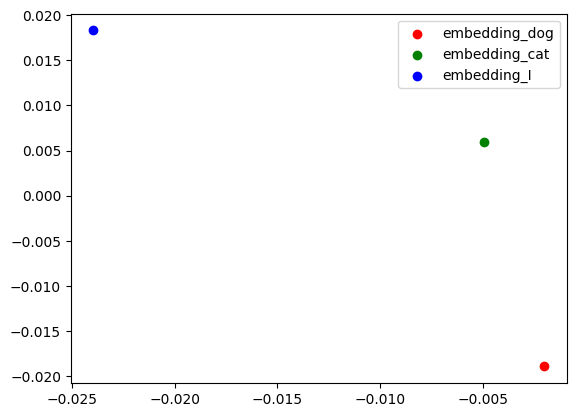

In [29]:
from scipy.spatial.distance import euclidean

distance_dog_cat = euclidean(embedding_dog, embedding_cat)
distance_dog_I = euclidean(embedding_dog, embedding_I)
distance_cat_I = euclidean(embedding_cat, embedding_I)

print(f"The distance between {phrase_dog} and {phrase_cat} is {distance_dog_cat:.2f}")
print(f"The distance between {phrase_dog} and {phrase_I} is {distance_dog_I:.2f}")
print(f"The distance between {phrase_cat} and 'I{phrase_I} is {distance_cat_I:.2f}")


from sklearn.metrics.pairwise import cosine_distances

# calculate cosine distance between embedding_dog and embedding_cat
cosine_distance_dog_cat = cosine_distances([embedding_dog], [embedding_cat])[0][0]

# calculate cosine distance between embedding_dog and embedding_I
cosine_distance_dog_I = cosine_distances([embedding_dog], [embedding_I])[0][0]

# calculate cosine distance between embedding_cat and embedding_I
cosine_distance_cat_I = cosine_distances([embedding_cat], [embedding_I])[0][0]

print(f"The distance between {phrase_dog} and {phrase_cat} is {cosine_distance_dog_cat:.2f}")
print(f"The distance between {phrase_dog} and {phrase_I} is {cosine_distance_dog_I:.2f}")
print(f"The distance between {phrase_cat} and 'I{phrase_I} is {cosine_distance_cat_I:.2f}")


import matplotlib.pyplot as plt

# create a list of labels for each embedding
labels = ['embedding_dog', 'embedding_cat', 'embedding_I']

# create a list of colors for each embedding
colors = ['red', 'green', 'blue']

# create a scatter plot of the embeddings
plt.scatter([embedding_dog[0]], [embedding_dog[1]], color=colors[0], label=labels[0])
plt.scatter([embedding_cat[0]], [embedding_cat[1]], color=colors[1], label=labels[1])
plt.scatter([embedding_I[0]], [embedding_I[1]], color=colors[2], label=labels[2])

# add a legend to the plot
plt.legend()

# show the plot
plt.show()

Why cosine distance??
![](2023-11-07-16-32-24.png)
[source](https://platform.openai.com/docs/guides/embeddings/limitations-risks#:~:text=which%20distance%20function%20should%20i%20use%3F)

Yay! As we can see with both the distance equations we used (euclidean and cosine distance) we obtain outputs that align with our initial expectations!